# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,...,Open 60-Day Shifted Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,True Range Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced,Date,Symbol
0,-0.082146,-0.211123,-0.211123,-0.355936,-0.279668,4.506073,-0.394063,-0.386806,-0.411949,-0.256814,...,-0.099365,-0.065462,0.021662,0.207475,-0.143825,0.001395,-0.216950,-0.124697,2014-09-04,14
1,-0.199298,-0.211123,-0.211123,-0.355936,-0.279668,4.506073,-0.394063,-0.386806,-0.411949,-0.256814,...,0.128093,-0.026616,-0.135444,0.292787,-0.199996,-0.087753,-0.355281,-0.261008,2014-09-04,262
2,0.256066,-0.211123,-0.211123,-0.355936,-0.279668,-0.221923,-0.394063,-0.386806,-0.411949,-0.256814,...,-0.127797,-0.051266,-0.014738,0.014914,0.041423,-0.083876,-0.089539,-0.100843,2014-09-04,105
3,0.809517,-0.211123,-0.211123,-0.355936,-0.279668,-0.221923,2.537663,-0.386806,-0.411949,-0.256814,...,0.163632,0.078857,0.052865,0.340484,0.049223,0.117676,0.048791,-0.012241,2014-09-04,395
4,-0.205682,-0.211123,-0.211123,2.809494,-0.279668,-0.221923,-0.394063,-0.386806,-0.411949,-0.256814,...,0.106768,-0.007671,-0.240677,-0.105232,-0.049846,-0.320311,-0.064057,-0.346203,2014-09-04,202


In [4]:
X_test.head(5)

,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,...,Open 60-Day Shifted Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,True Range Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced,Date,Symbol
0,-0.263726,-0.211123,4.736577,-0.355936,-0.279668,-0.221923,-0.394063,-0.386806,-0.411949,-0.256814,...,-0.181107,-0.262042,-0.154274,-1.323139,-0.492231,-0.014108,-0.377124,0.161556,2021-01-04,139
1,-0.186121,-0.211123,-0.211123,-0.355936,3.575666,-0.221923,-0.394063,-0.386806,-0.411949,-0.256814,...,-0.216647,-0.008371,-0.027088,-0.381858,-0.122099,0.016899,-0.064058,0.035468,2021-01-04,255
2,-0.309133,-0.211123,-0.211123,-0.355936,-0.279668,-0.221923,2.537663,-0.386806,-0.411949,-0.256814,...,-0.778181,-0.134680,-0.002115,-0.513907,-0.962961,0.303723,-0.621021,0.386469,2021-01-04,378
3,-0.225167,-0.211123,-0.211123,-0.355936,-0.279668,-0.221923,-0.394063,-0.386806,2.427487,-0.256814,...,0.348439,-0.106183,-0.067764,-0.330715,-0.801156,0.156436,-0.497253,0.076363,2021-01-04,141
4,0.330085,-0.211123,-0.211123,-0.355936,-0.279668,-0.221923,-0.394063,-0.386806,-0.411949,3.893864,...,-0.056716,-0.115870,0.046599,-0.063529,-0.173969,0.040155,-0.140504,0.015022,2021-01-04,253


In [5]:
y_train.head(5)

,1-week Forward Return Sign
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [6]:
y_test.head(5)

,1-week Forward Return Sign
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


# Fit Logistic Regression Model

### Check class imbalance

<Axes: title={'center': 'Frequency of each class in the training and test targets'}>

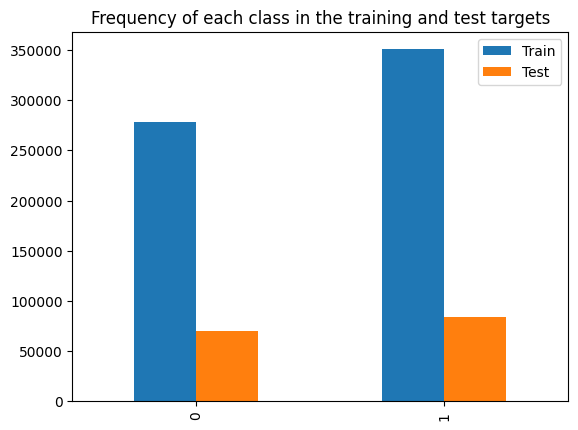

In [7]:
# Examine class imbalance in training and test sets
train_classes = y_train.value_counts().sort_index()
test_classes = y_test.value_counts().sort_index()
class_freq = pd.DataFrame(data=zip(train_classes, test_classes), columns=['Train', 'Test'], index=[0, 1])
class_freq.plot(kind='bar', title='Frequency of each class in the training and test targets')

### Parameter Optimization

In [8]:
# Imports
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create base model
lr = LogisticRegression()

# Create time series split object to allow for CV without look-ahead bias
tscv = TimeSeriesSplit(n_splits=5)

In [9]:
# Create random search object
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=grid,
    n_iter=12,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3,
    refit=False
)

# Fit the grid search to data
random_search.fit(X_train.drop(['Date', 'Symbol'], axis=1), y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=LogisticRegression(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   refit=False, scoring='accuracy', verbose=3)

In [10]:
# Get results of all trained models
cv_results = random_search.cv_results_
print(cv_results)

# Get best params and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best params are {best_params}")
print(f"Best accuracy score is {best_score}")

# Save best parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

{'mean_fit_time': array([ 14.43596787,  32.01284347, 156.84489036,  43.89800258,
       269.65866194,  47.13619142]), 'std_fit_time': array([  6.44869814,  13.6186564 ,  68.76512761,  14.52993343,
       113.56305342,   7.9958679 ]), 'mean_score_time': array([0.06037803, 0.05773993, 0.05833373, 0.05832076, 0.05387444,
       0.05483403]), 'std_score_time': array([0.00289527, 0.00267661, 0.00225209, 0.00089753, 0.00805916,
       0.00890583]), 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False, False, Fa

### Train model

In [11]:
# Fit model with best params
lr = LogisticRegression(**best_params)
lr.fit(X_train.drop(['Date', 'Symbol'], axis=1), y_train)
lr.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 9.80988835e-03, -2.83442056e-02, -1.85084934e-02,
        -1.91266050e-02, -1.57483333e-02, -5.00851551e-02,
        -8.99280854e-03, -1.19913330e-02, -1.20950265e-02,
        -1.08920699e-02,  3.20821419e-03,  1.86527440e-01,
         3.38602636e-02, -8.34956330e-03,  3.54574384e-02,
         6.04946570e-02,  1.19892255e-01, -9.47023340e-02,
         1.13164741e-02,  7.53055064e-03,  1.56180747e-02,
        -4.19709446e-03, -4.81324021e-03, -1.23937228e-02,
         1.12543158e-01, -1.14264527e-04, -3.08595185e-02,
        -2.91515445e-02, -3.03500360e-02,  5.54513980e-03,
         1.83331488e-02, -2.06682883e-02,  1.18117185e-02,
        -2.95696030e-02, -1.10257832e-01,  2.18364025e-03,
        -3.19866192e-02,  1.39769819e-02, -8.94657483e-03,
        -6.18546585e-02,  1.60609680e-02,  1.82819078e-02,
         2.28007835e-01,  6.35678608e-02, -2.87480834e-02,
        -9.06805025e-02, -1.67919803e-01, -1.04188487e-01,
         1.77541387e-01,  6.61429461e-02,  1.43994479e-0

In [12]:
# Save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)